In [1]:
using Interact
using Plots
using Random
using Distributions
using BenchmarkTools
using RandomMatrices
using LinearAlgebra
using StatsBase

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11883677857722805951\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-839378770213815224\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11883677857722805951\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Recompiling stale cache file /home/wwang/.julia/compiled/v1.2/Interact/XmYW4.ji for Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/wwang/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/wwang/.julia/compiled/v1.2/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/wwang/.julia/compiled/v1.2/RandomMatrices/vcDqM.ji for RandomMatrices [2576dda1-a324-5b11-aa66-c48ed7e3c618]
└ @ Base loading.jl:1240


If the interactive portion fails to run, check that you:
1. Have the jupyter extension:\
using WebIO\
WebIO.install_jupyter_nbextension() <- if you use jupyter notebook\
WebIO.install_jupyter_labextension() <- if you use jupyter lab
2. Run the following, then restart the kernel and try again:\
using Pkg; Pkg.update("Interact"); Pkg.build("Interact");

In [2]:
# Compute birth times T(m,n) on a grid of size (M,N) with a particular waiting time distribution
function get_birth_times(M, N, distr)
    samples = rand(distr, M, N)
    T = zeros(M, N)
    
    # Initializing
    T[:,1] = cumsum(samples[:,1])
    T[1,:] = cumsum(samples[1,:])
    
    for j = 2:N
        for i = 2:M
            T[i,j] = max(T[i-1,j], T[i,j-1]) + samples[i,j]
        end
    end
    return T
end

get_birth_times (generic function with 1 method)

In [3]:
limiting_shape_exp(x,y) = √(x) + √(y)

limiting_shape_exp (generic function with 1 method)

In [4]:
M=50; N=50; distr = Exponential(1);

In [5]:
# Computes growth at every slider position. Comparable speed to precomputed, since Interact/Plots take the most time.
function visualize_random_growth(M,N,distr;time_interval = 1, T=100)
    birth_times = get_birth_times(M,N,distr)
    
    offset1 = ones(M,N)
    offset2 = ones(M,N)
    offset3 = ones(M,N)

    @manipulate for t in slider(range(0, length = T, step = time_interval),value=0)
        current_map = birth_times .<= t
        offset1[1:(M-1),:] = current_map[2:M,:]
        offset2[:,1:(N-1)] = current_map[:,2:N]
        offset3[1:(M-1),1:(N-1)] = current_map[2:M,2:N]
        is_boundary = (current_map .> offset1) .| (current_map .> offset2) .| (current_map .> offset3)

        current_map = current_map + 0.5*is_boundary
        
        p = heatmap(current_map, aspect_ratio=1, colorbar=false, clims=(0, 1.5), 
                    xlims = (0, N), ylims=(0, M))

        plot!(title="t = $t")
        
        if t > 0   # draw limiting shape
            contour!(1:M,1:N,
                     (x, y) -> limiting_shape_exp(x/t, y/t), levels=[1.0], color=:blue, lw=3)
        end
        
        p
        
    end
    
end

visualize_random_growth (generic function with 1 method)

In [9]:
visualize_random_growth(400,400,distr, time_interval = 1, T = 400)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 400,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/wwang/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/wwang/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/wwang/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/wwang/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/wwang/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f7060718010, Task (runnable) @0x00007f7060718010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"

In [7]:
# Assumes M=N, time_interval is 1
# Rescales so each time step t only shows the 1:t portion of the grid, normalized to (0,1)
function visualize_random_growth_rescaled(M,N,distr;time_interval = 1, T=100)
    birth_times = get_birth_times(M,N,distr)
    
    offset1 = ones(M,N)
    offset2 = ones(M,N)
    offset3 = ones(M,N)

    @manipulate for t in slider(range(0, length = T, step = time_interval),value=0)
        i = trunc(Int32, t /time_interval + 1)
        current_map = birth_times .<= t
        offset1[1:(M-1),:] = current_map[2:M,:]
        offset2[:,1:(N-1)] = current_map[:,2:N]
        offset3[1:(M-1),1:(N-1)] = current_map[2:M,2:N]
        is_boundary = (current_map .> offset1) .| (current_map .> offset2) .| (current_map .> offset3)

        current_map = current_map + 0.5*is_boundary
        
        p = heatmap(0:(1/i):1,0:(1/i):1,current_map[1:i,1:i], aspect_ratio=1, colorbar=false, clims=(0, 1.5), 
                   xlims = (0, 1), ylims=(0, 1))
        
        plot!(title="t = $t")
        
        if t > 0   # draw limiting shape
            contour!((0:0.01:1), (0:0.01:1),
                     (x, y) -> limiting_shape_exp(x,y), levels=[1.0], color=:blue, lw=3)
        end
        
        
        p
        
    end
    
end

visualize_random_growth_rescaled (generic function with 1 method)

In [8]:
visualize_random_growth_rescaled(400,400,Exponential(1), time_interval = 1, T = 400)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 400,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/wwang/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/wwang/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/wwang/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/wwang/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/wwang/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f7060719120, Task (runnable) @0x00007f7060719120), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"

In [12]:
# We can make gifs
function animate_growth(M, N, distr;time_interval=1, T=100)
    birth_times = get_birth_times(M,N,distr)
    
    offset1 = ones(M,N)
    offset2 = ones(M,N)
    offset3 = ones(M,N)
    anim = @animate for t in range(0, length = T, step = time_interval)
        i = trunc(Int32, t /time_interval + 1)
        current_map = (birth_times .<= t)*1.0
        offset1[1:(M-1),:] = current_map[2:M,:]
        offset2[:,1:(N-1)] = current_map[:,2:N]
        offset3[1:(M-1),1:(N-1)] = current_map[2:M,2:N]
        is_boundary = (current_map .> offset1) .| (current_map .> offset2) .| (current_map .> offset3)

        current_map = current_map + 0.5*is_boundary
        
        p = heatmap(current_map, aspect_ratio=1, colorbar=false, clims=(0, 1.5), 
                    xlims = (0, N), ylims=(0, M))
        plot!(title="t = $t")
        if t > 0   # draw limiting shape
            contour!(1:M,1:N,
                     (x, y) -> limiting_shape_exp(x/t, y/t), levels=[1.0], color=:blue, lw=3)
        end
        p
    end
end

animate_growth (generic function with 1 method)

In [13]:
anim=animate_growth(40,40,Exponential(1),time_interval=1,T=200)

Animation("/tmp/jl_nUrpH9", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000191.png", "000192.png", "000193.png", "000194.png", "000195.png", "000196.png", "000197.png", "000198.png", "000199.png", "000200.png"])

┌ Info: Saved animation to 
│   fn = /home/wwang/Documents/mit/mit-18_338/final_proj/animation_demo.gif
└ @ Plots /home/wwang/.julia/packages/Plots/AXUqs/src/animation.jl:98


Plots.AnimatedGif("/home/wwang/Documents/mit/mit-18_338/final_proj/animation_demo.gif")
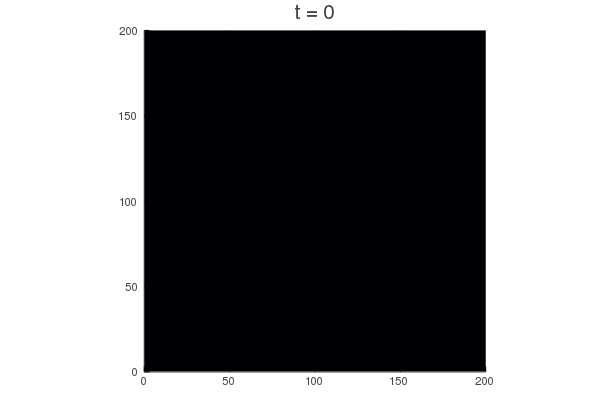

In [515]:
gif(anim, "animation_demo.gif", fps=30)

In [15]:
# We can make gifs
function animate_growth_rescaled(M, N, distr;time_interval=1, T=100)
    birth_times = get_birth_times(M,N,distr)
    
    offset1 = ones(M,N)
    offset2 = ones(M,N)
    offset3 = ones(M,N)
    anim = @animate for t in range(0, length = min(T,M,N), step = time_interval)
        i = trunc(Int32, t /time_interval + 1)
        current_map = birth_times .<= t
        offset1[1:(M-1),:] = current_map[2:M,:]
        offset2[:,1:(N-1)] = current_map[:,2:N]
        offset3[1:(M-1),1:(N-1)] = current_map[2:M,2:N]
        is_boundary = (current_map .> offset1) .| (current_map .> offset2) .| (current_map .> offset3)

        current_map = current_map + 0.5*is_boundary
        
        p = heatmap(0:(1/i):1,0:(1/i):1,current_map[1:i,1:i], aspect_ratio=1, colorbar=false, clims=(0, 1.5), 
                   xlims = (0, 1), ylims=(0, 1))
        
        plot!(title="t = $t")
        
        if t > 0   # draw limiting shape
            contour!((0:0.01:1), (0:0.01:1),
                     (x, y) -> limiting_shape_exp(x,y), levels=[1.0], color=:blue, lw=3)
        end
        
        
        p
    end
end

animate_growth_rescaled (generic function with 1 method)

In [18]:
anim=animate_growth_rescaled(200,200,Exponential(1),time_interval=1,T=400)

Animation("/tmp/jl_hvAQP8", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000191.png", "000192.png", "000193.png", "000194.png", "000195.png", "000196.png", "000197.png", "000198.png", "000199.png", "000200.png"])

┌ Info: Saved animation to 
│   fn = /home/wwang/Documents/mit/mit-18_338/final_proj/animation_rescaled_demo.gif
└ @ Plots /home/wwang/.julia/packages/Plots/AXUqs/src/animation.jl:98


Plots.AnimatedGif("/home/wwang/Documents/mit/mit-18_338/final_proj/animation_rescaled_demo.gif")
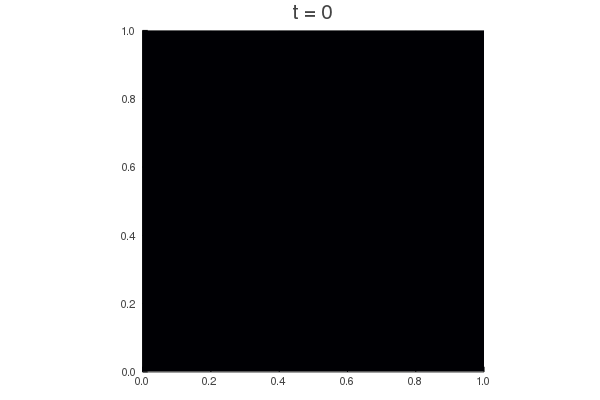

In [19]:
gif(anim, "animation_rescaled_demo.gif", fps=30)

# Finite Distribution: The Laguerre Ensemble
The theoretical results that we verify are from Johansson 2000: "Shape fluctuations and random matrices."

In [10]:
# Sampling procedures: largest eigenvalue of the Laguerre ensemble (beta=2),m>=n
chi(df::Real) = rand(Chi(df))

# Uses matrix multiplication and max eigenvalue of unstructured matrix
function sample_laguerre(nsamples, m,n)
    if m<n
        temp = m;m=n;n=temp;
    end
    normal = Normal(0,1/√(2))
    samples = zeros(nsamples)
    for j=1:nsamples
        mat = rand(normal, n, m)+rand(normal, n, m)*im
        samples[j] = eigmax(mat*mat')
    end
    return samples
end

# Uses bidiagonal reduction of randn(m,n)
function sample_laguerre_trid(nsamples, m,n)
    if m<n
        temp = m;m=n;n=temp;
    end
    # a = beta * n/2
    samples = zeros(nsamples)
    beta = 2
    for j=1:nsamples
        b=1/√(2)*Bidiagonal([chi((m-i)*beta) for i=0:n-1], [chi(beta*i) for i=n-1:-1:1], :L)
        prod = b*b'
        tridiag = convert(SymTridiagonal{Float64,Array{Float64,1}},SymTridiagonal(diag(prod),diag(prod,1)))
        samples[j] = eigmax(tridiag)
    end
    return samples
end

# More efficient version of trid ?
function sample_laguerre_trid_efficient(nsamples, m,n)
    if m<n
        temp = m;m=n;n=temp;
    end
    # a = beta * n/2
    samples = zeros(nsamples)
    beta = 2
    for j=1:nsamples
        chidiag = [chi((m-i)*beta) for i=0:n-1]
        chidiag1 = [chi(beta*i) for i=n-1:-1:1]
        newdiag = chidiag.^2 .+ [0;chidiag1].^2
        newdiag1 = chidiag[1:(n-1)].*chidiag1
        tridiag = SymTridiagonal(newdiag,newdiag1)
        samples[j] = 1/2*eigmax(tridiag)
    end
    return samples
end

# Uses random growth to sample
function sample_laguerre_growth(nsamples, m, n)
    samples = zeros(nsamples)
    for j=1:nsamples
        samples[j] = get_birth_times(m,n,Exponential(1))[m,n]
    end
    return samples
end

sample_laguerre_growth (generic function with 1 method)

In [11]:
nsamples = 50000
m = 100; n = 100;
data = sample_laguerre_trid_efficient(nsamples, m, n);
data2 = sample_laguerre_growth(nsamples, m, n);
println(mean(data))
println(mean(data2))
println(var(data))
println(var(data2))

379.54398802362266
379.57541503683836
105.7384263293382
105.25090912508928


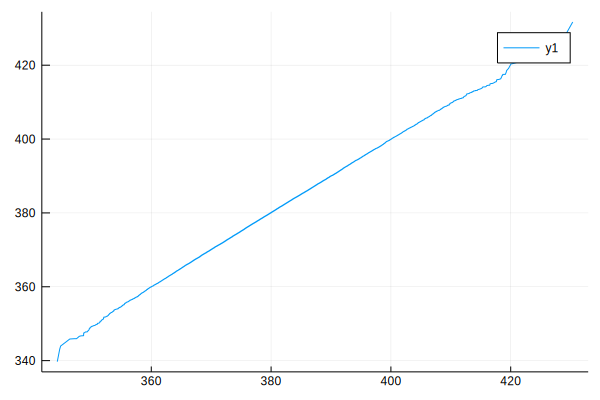

In [12]:
plot(sort(data),sort(data2))

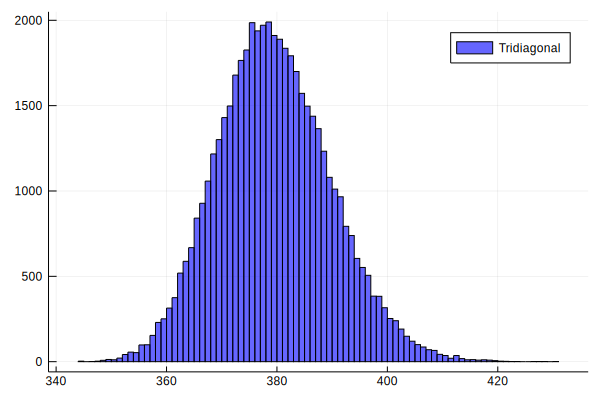

In [13]:
histogram(data,color=:blue,fillalpha=0.6,label="Tridiagonal")

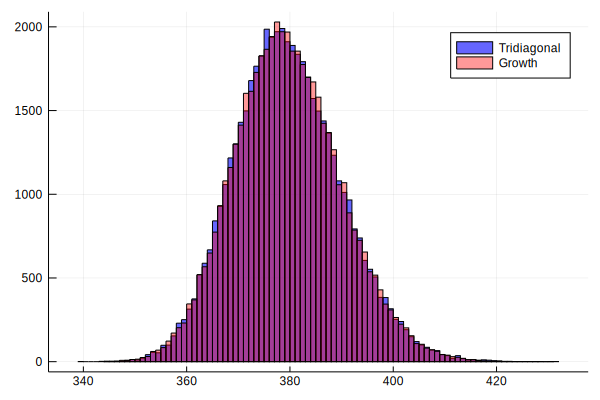

In [14]:
histogram!(data2,color=:red,fillalpha=0.4,label="Growth")

# Tracy-Widom Asymptotics

In [15]:
# If a_n = O(n^(1/3)),
#    d_n - (1+1/√(γ))a_n = o(n^1/3), then for every γ>=1,
# D_n -> F in distribution, where
#     D_n = (T(γn + a_n, n) - n(1+√(γ))^2 - d_n)/(γ^(-1/6)(1+√(γ))^(4/3)n^(1/3))
# and F is the Tracy-Widom distribution (β=2).

In [15]:
tw = TracyWidom()

TracyWidom()

In [17]:
nsamples = 5000
plot_range = -5:0.2:3
tw_cdf = (s->cdf(tw, s)).(plot_range)
nrange = 1:100
a_n = zeros(length(nrange))
d_n = zeros(length(nrange))
# a_n = (nrange.+100).^(1/4)
# d_n = nrange.^(1/3.5)
# a_n = nrange.^(1/2)
# d_n = nrange.^(1/2)
@manipulate for i in slider(1:length(nrange),value=1), gamma in slider(1:0.5:4,value=1)
    n=nrange[i]
    data = sample_laguerre_trid_efficient(nsamples, gamma*n+a_n[i], n);
    data = (data .- (1+√(gamma))^2*n .- d_n[i]).* gamma^(1/6) ./((1+√(gamma))^(4/3)*n^(1/3))
    data_ecdf = ecdf(data);
    p1=histogram(data,title="Fluctuation hist, dimension $n, gamma=$gamma")
    p2=plot(-5:0.2:3,data_ecdf.(-5:0.2:3),color=:blue,label="Growth",title="CDF Convergence")
    p2=plot!(-5:0.2:3,tw_cdf,color=:red,label="Tracy-Widom")
    plot(p1,p2,layout=(2,1))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/wwang/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/wwang/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/wwang/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/wwang/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/wwang/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f7060f55390, Task (runnable) @0x00007f7060f55390), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\"

# Various Benchmarks

In [24]:
@benchmark sample_laguerre_trid_efficient(50,100,100) samples=5

BenchmarkTools.Trial: 
  memory estimate:  1.39 MiB
  allocs estimate:  8802
  --------------
  minimum time:     3.689 ms (0.00% GC)
  median time:      3.819 ms (0.00% GC)
  mean time:        3.900 ms (0.00% GC)
  maximum time:     4.333 ms (0.00% GC)
  --------------
  samples:          5
  evals/sample:     1

In [25]:
@benchmark sample_laguerre(50,100,100) samples=5

BenchmarkTools.Trial: 
  memory estimate:  49.82 MiB
  allocs estimate:  1301
  --------------
  minimum time:     119.492 ms (4.66% GC)
  median time:      120.322 ms (4.56% GC)
  mean time:        123.697 ms (4.87% GC)
  maximum time:     136.126 ms (3.76% GC)
  --------------
  samples:          5
  evals/sample:     1

In [26]:
@benchmark sample_laguerre_growth(50,100,100) samples=5

BenchmarkTools.Trial: 
  memory estimate:  7.81 MiB
  allocs estimate:  401
  --------------
  minimum time:     7.588 ms (0.00% GC)
  median time:      7.833 ms (0.00% GC)
  mean time:        8.105 ms (4.62% GC)
  maximum time:     9.399 ms (19.91% GC)
  --------------
  samples:          5
  evals/sample:     1

In [23]:
@benchmark sample_laguerre_trid_efficient(1000,5,10) samples=5

BenchmarkTools.Trial: 
  memory estimate:  4.46 MiB
  allocs estimate:  81491
  --------------
  minimum time:     13.219 ms (0.00% GC)
  median time:      14.132 ms (0.00% GC)
  mean time:        15.617 ms (7.59% GC)
  maximum time:     19.265 ms (30.75% GC)
  --------------
  samples:          5
  evals/sample:     1

In [22]:
@benchmark sample_laguerre_growth(1000,5,10) samples=5

BenchmarkTools.Trial: 
  memory estimate:  1.50 MiB
  allocs estimate:  6001
  --------------
  minimum time:     1.582 ms (0.00% GC)
  median time:      2.015 ms (0.00% GC)
  mean time:        2.221 ms (0.00% GC)
  maximum time:     3.469 ms (0.00% GC)
  --------------
  samples:          5
  evals/sample:     1

# Misc

In [34]:
visualize_random_growth(200,200,Exponential(20), time_interval = 20, T = 200)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 200,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/wwang/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/wwang/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/wwang/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/wwang/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/wwang/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f7055e109d0, Task (runnable) @0x00007f7055e109d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"20\",\"40\",\"60\",\"80\",\"100\",\"120\",\"140\",\"160\",\"180\",\"200\",\"220\",\"240\",\"260\",\"280\",\"300\",\"320\",\"340\",\"360\",\"380\",\"400\",\"420\",\"440\",\"460\",\"480\",\"500\",\"520\",\"540\",\"560\",\"580\",\"600\",\"620\",\

In [35]:
visualize_random_growth(200,200,Chisq(20), time_interval = 20, T = 200)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 200,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/wwang/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/wwang/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/wwang/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/wwang/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/wwang/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f70554ac010, Task (runnable) @0x00007f70554ac010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"20\",\"40\",\"60\",\"80\",\"100\",\"120\",\"140\",\"160\",\"180\",\"200\",\"220\",\"240\",\"260\",\"280\",\"300\",\"320\",\"340\",\"360\",\"380\",\"400\",\"420\",\"440\",\"460\",\"480\",\"500\",\"520\",\"540\",\"560\",\"580\",\"600\",\"620\",\

In [31]:
visualize_random_growth(300,300,Uniform(0,5), time_interval = 1, T = 200)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 200,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/wwang/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/wwang/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/wwang/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/wwang/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/wwang/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f7055c10eb0, Task (runnable) @0x00007f7055c10eb0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"